### Introduction to Neural Network Classification in Tensorflow

In [1]:
# DL needs
import tensorflow as tf
import tensorflow.keras as kr

# Data needs
import pandas as pd
from sklearn.model_selection import train_test_split

# Numerical computation needs
import numpy as np

# plotting needs
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

# ensuring reproducibility
random_seed=42
tf.random.set_seed(random_seed)

2025-03-04 14:34:39.263354: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


**6. Improving Predictions on Fashion MNIST using normalized data**

In [2]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels),(test_data,test_labels) = fashion_mnist.load_data()

In [3]:
# creating dictationary of labels:
labels = ['T-shirt/top', 
          'Trouser', 
          'Pullover',
          'Dress',   
          'Coat',    
          'Sandal',  
          'Shirt',   
          'Sneaker', 
          'Bag',     
          'Ankle boot']

In [4]:
# normalizing data
train_data_norm=(train_data-train_data.min())/train_data.max()
test_data_norm=(test_data-test_data.min())/test_data.max()
print(train_data_norm[0].min(),",",train_data_norm[0].max())
print(test_data_norm[0].min(),",",test_data_norm[0].max())

0.0 , 1.0
0.0 , 1.0


In [5]:
# one-hot encode labels
train_labels_ohe=tf.one_hot(train_labels,len(labels))
print(train_labels_ohe[:5])
test_labels_ohe=tf.one_hot(test_labels,len(labels))
print(test_labels_ohe[:5])

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(5, 10), dtype=float32)
tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]], shape=(5, 10), dtype=float32)


In [ ]:
# creating a model

class FashionNet(kr.Model):
    def __init__(self,lr=0.001,model_name="model_1",metrics=['accuracy']):
        super().__init__(name=model_name)
        # instantiating constructor of parent class

        # input layer:
        self.input_layer=tf.keras.Input(shape=[28,28],name='input_layer')
        
        # flattening the input
        self.flatten=kr.layers.Flatten(input_shape=(28,28),name='flatten')

        # hidden layer:
        self.fc1 = kr.layers.Dense(4,activation=None,name='hl1')
        self.fc2 = kr.layers.Dense(4,activation=None,name='hl2')
        # self.fc3 = kr.layers.Dense(4,activation=None,name='hl3')

        # output layer
        self.output_layer=kr.layers.Dense(10,activation=None,name='output_layer')


        # other hyper-params
        self.loss_function="categorical_crossentropy"
        self.optimizer=kr.optimizers.Adam(learning_rate=lr)
        self.eval_metrics=metrics

    def call(self,inputs):
        # forward propogation
        x=self.flatten(inputs)
        x=tf.nn.relu(self.fc1(x))
        x=tf.nn.relu(self.fc2(x))
        # x=tf.nn.relu(self.fc3(x))
        output=tf.nn.softmax(self.output_layer(x))
        return output

In [11]:
model_without_norm = FashionNet(model_name='model_without_norm',lr=0.001)
model_without_norm(tf.keras.Input(shape=[28,28]))  
model_without_norm.compile(loss=model_without_norm.loss_function,optimizer=model_without_norm.optimizer,metrics=model_without_norm.eval_metrics)
model_without_norm.summary()
history_without_norm=model_without_norm.fit(train_data,train_labels_ohe,epochs=10,
                      validation_data=(test_data,test_labels_ohe))

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "model_without_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1075 - loss: 3.7433 - val_accuracy: 0.1371 - val_loss: 2.2241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1721 - loss: 2.0621 - val_accuracy: 0.2643 - val_loss: 1.7186
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2689 - loss: 1.7024 - val_accuracy: 0.2857 - val_loss: 1.6407
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2842 - loss: 1.6393 - val_accuracy: 0.3063 - val_loss: 1.6032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2985 - loss: 1.6026 - val_accuracy: 0.3200 - val_loss: 1.5812
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3112 - loss: 1.5845 - val_accuracy: 0.3258 - val_loss: 1.5647
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3228 - loss: 1.5648 - val_accuracy: 0.3388 - val_loss: 1.5500
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3405 - loss: 1.5335 - 

In [12]:
model_norm = FashionNet(model_name='model_norm',lr=0.001)
model_norm(tf.keras.Input(shape=[28,28]))  
model_norm.compile(loss=model_norm.loss_function,optimizer=model_norm.optimizer,metrics=model_norm.eval_metrics)
model_norm.summary()
history_norm=model_norm.fit(train_data_norm,train_labels_ohe,epochs=10,
                      validation_data=(test_data_norm,test_labels_ohe))

/home/rudraksha14/.local/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "model_norm"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl1 (Dense)                     │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hl2 (Dense)                     │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,210 (12.54 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-03-04 14:44:29.808649: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3345 - loss: 1.7399 - val_accuracy: 0.6145 - val_loss: 1.0963
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6303 - loss: 1.0235 - val_accuracy: 0.6884 - val_loss: 0.8855
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6971 - loss: 0.8467 - val_accuracy: 0.7414 - val_loss: 0.7542
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7597 - loss: 0.7208 - val_accuracy: 0.7719 - val_loss: 0.6811
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7877 - loss: 0.6471 - val_accuracy: 0.7863 - val_loss: 0.6423
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7975 - loss: 0.6140 - val_accuracy: 0.7949 - val_loss: 0.6211
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8017 - loss: 0.5917 - val_accuracy: 0.7990 - val_loss: 0.6059
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8074 - loss: 0.5725 - val_accurac

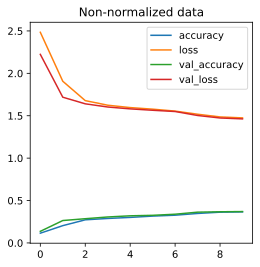

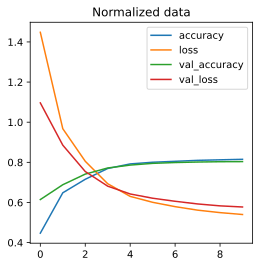

In [15]:
# plot loss curves: non-normalized loss curves
pd.DataFrame(history_without_norm.history).plot(title='Non-normalized data',figsize=(4,4))
pd.DataFrame(history_norm.history).plot(title='Normalized data',figsize=(4,4))
plt.show()

**Note:**
<br>
When making comparisons, the same model with even slightly different data can produce dramatically different results. When comparing models, it is important to make sure that you're comparing them on the same criteria: (same architecture, but different data) or (same data or different architecture)

***-- CONTD IN NEXT NOTEBOOK --***